In [42]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [48]:
#define state
class BMIstate(TypedDict):
    weight_kg: float
    height_cm: float
    bmi: float
    label: str



In [49]:
def calculate_bmi(state:BMIstate)->BMIstate:
    weight = state['weight_kg']
    height = state['height_cm']
    bmi = weight/(height**2)
    state['bmi']=round(bmi,2)
    return state



In [53]:
def label_weight(state:BMIstate)->BMIstate:
    bmi_value=state['bmi']
    if bmi_value<=18.5:
        state['label']='Underweight'
    elif bmi_value>18.5 and bmi_value<=24.9:
        state['label']='Healthy'
    elif bmi_value>24.9 and bmi_value<=29.9:
        state['label']='Overweight'
    else:
        state['label']='Obesity'

    return state

In [54]:
#define graph
graph=StateGraph(BMIstate)

#add nodes to graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('label_person',label_weight)
#add edges to the graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','label_person')
graph.add_edge('label_person',END)

#compile the graph
workflow=graph.compile()



In [55]:
#execute the graph
output=workflow.invoke({'weight_kg':80,'height_cm':1.73})
print(output)

{'weight_kg': 80, 'height_cm': 1.73, 'bmi': 26.73, 'label': 'Overweight'}


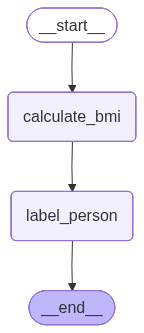

In [57]:

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())